<a href="https://colab.research.google.com/github/alyahoang99/causal_inference_synthetic_data/blob/main/experiement_generate_synthetic_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random
import pandas as pd
import tqdm
import numpy as np

# OPS time

In [ ]:
# example of number agents
num_agents = 1000

In [ ]:
# generating synthetic data
tmp_data = []
for agent_id in tqdm.tqdm(range(num_agents//2)):
  tmp_data.append({
      'agent_id': agent_id,
      'num_cases': int(np.random.normal(100,30)),
      'passed_training': 1 if random.random() < 0.5 else 0,
      'tenure': int(np.random.exponential(6)),
      'treatment': 0,
      'cs-center': random.choices(['InnovativeSupport', 'FutureCS'], [0.7, 0.3])[0]
  })
for agent_id in tqdm.tqdm(range(num_agents//2)):
  tmp_data.append({
      'agent_id': num_agents//2 + agent_id,
      'num_cases': int(np.random.normal(100,30)),
      'passed_training': 1 if random.random() < 0.5 else 0,
      'tenure': int(np.random.exponential(30)),
      'treatment': 1,
      'cs-center': random.choices(['SuperPros', 'ProfessionalAnswers'], [0.6, 0.4])[0]
  })
  agent_df = pd.DataFrame(tmp_data)

100%|██████████| 500/500 [00:01<00:00, 301.90it/s]


In [ ]:
# adding the average_min_per_case column
agent_df['average_mins_per_case'] = agent_df.tenure.map(
    lambda x: (np.random.normal(60*40, 3*60) - 10*x)/60
)
print(agent_df.head())

   agent_id  num_cases  passed_training  tenure  treatment          cs-center  \
0         0        131                1       6          0           FutureCS   
1         1        111                0       1          0  InnovativeSupport   
2         2        135                1      11          0  InnovativeSupport   
3         3        158                0       1          0  InnovativeSupport   
4         4        122                0       2          0  InnovativeSupport   

   average_mins_per_case  
0              40.688422  
1              39.880858  
2              37.922966  
3              42.151795  
4              39.148228  


Description of the dataset:
- case_id: unique ID for the case
- agent_id: unique ID for the agent
- treatment: equals 1 if agent was in an experiment group and have a chance to use LLMs, 0 - otherwise.
- time_spent_mins: minutes spent answering the customer's question.
- cs_center: customer support centre.
- complexity: equals low, medium or high
- tenure: number of months since the agent started working
- passed_training: whether the agent passed LLM training. This value can be equal to True only for the treatment group since this training was not offered to the agents from the control group.
- within_sla: equals 1 if the agent was able to anser the question within SLA
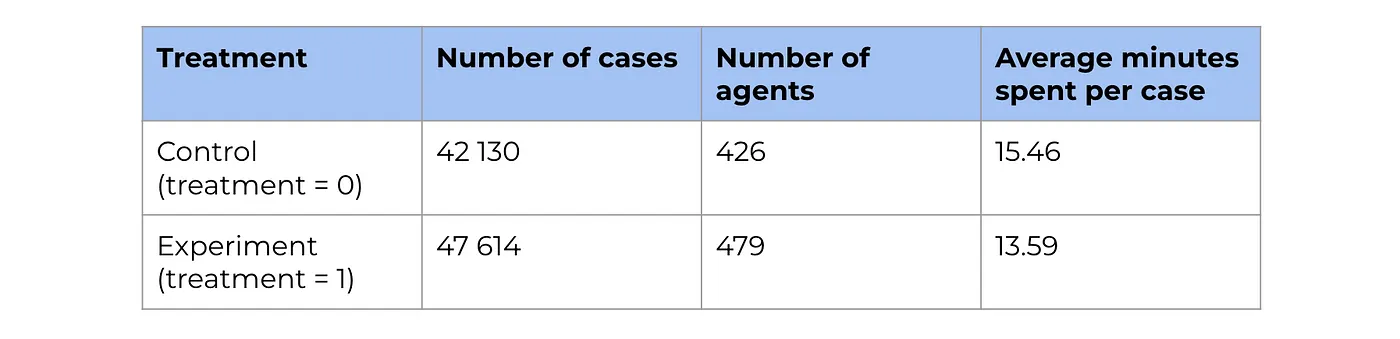

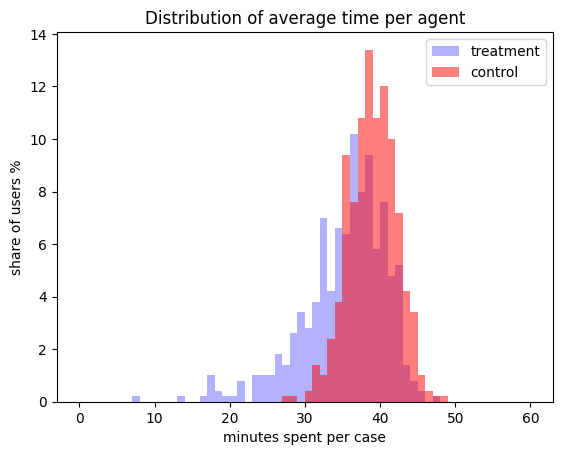

In [ ]:
import matplotlib.pyplot as plt

hist_range = [0,60]
hist_bins = 60

plt.hist(
    agent_df[agent_df.treatment == 1].average_mins_per_case.values,
    label = 'treatment',
    alpha = 0.3, range = hist_range, bins = hist_bins,
    color = 'b',
    # calculating weights to get normaized histogram
    weights = np.ones_like(agent_df[agent_df.treatment == 1].index)*100/agent_df[agent_df.treatment == 1].shape[0]
)
plt.hist(
    agent_df[agent_df.treatment == 0].average_mins_per_case.values,
    label = 'control',
    alpha = 0.5, range = hist_range, bins = hist_bins,
    color = 'r',
    # calculating weights to get normaized histogram
    weights = np.ones_like(agent_df[agent_df.treatment == 0].index)*100/agent_df[agent_df.treatment == 0].shape[0]
)

plt.legend(loc='upper right')
plt.title('Distribution of average time per agent')
plt.xlabel('minutes spent per case')
plt.ylabel('share of users %')
plt.show()

In [ ]:
agent_df = agent_df[agent_df.num_cases > 0]
agent_df = agent_df[agent_df.tenure > 0]
agent_df = agent_df[agent_df.average_mins_per_case > 10]
agent_df.shape[0]

922

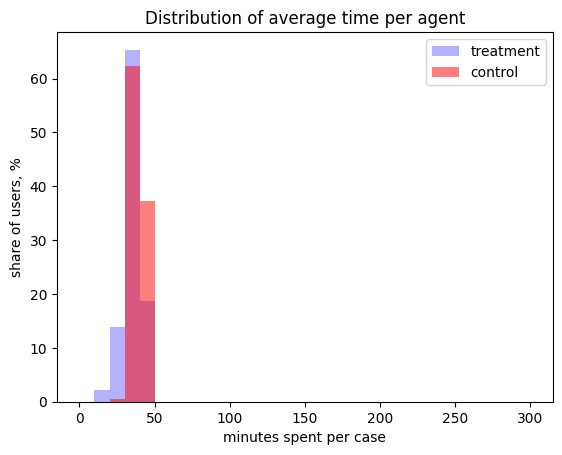

In [ ]:
hist_range = [0,300]
hist_bins = 30

plt.hist(
    agent_df[agent_df.treatment == 1].average_mins_per_case.values,
    label = 'treatment',
    alpha = 0.3, range = hist_range, bins = hist_bins,
    color = 'b',
    # calculating weights to get normaized histogram
    weights = np.ones_like(agent_df[agent_df.treatment == 1].index)*100/agent_df[agent_df.treatment == 1].shape[0]
)
plt.hist(
    agent_df[agent_df.treatment == 0].average_mins_per_case.values,
    label = 'control',
    alpha = 0.5, range = hist_range, bins = hist_bins,
    color = 'r',
    # calculating weights to get normaized histogram
    weights = np.ones_like(agent_df[agent_df.treatment == 0].index)*100/agent_df[agent_df.treatment == 0].shape[0]
)

plt.legend(loc='upper right')
plt.title('Distribution of average time per agent')
plt.xlabel('minutes spent per case')
plt.ylabel('share of users, %')
plt.show()

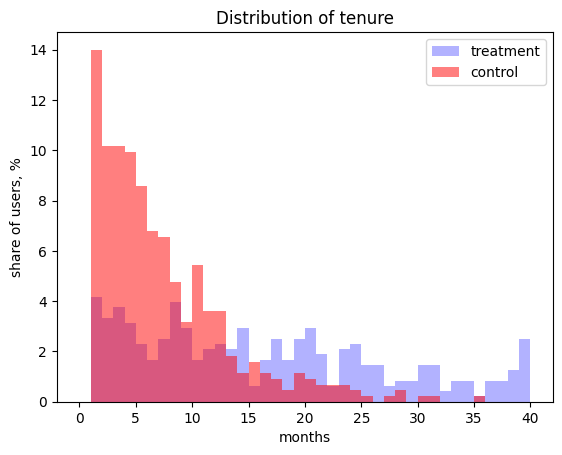

In [ ]:
hist_range = [0, 40]
hist_bins = 40

plt.hist(
    agent_df[agent_df.treatment == 1].tenure.values,
    label = 'treatment',
    alpha = 0.3, range = hist_range, bins = hist_bins,
    color = 'b',
    # calculating weights to get normaized histogram
    weights = np.ones_like(agent_df[agent_df.treatment == 1].index)*100/agent_df[agent_df.treatment == 1].shape[0]
)
plt.hist(
    agent_df[agent_df.treatment == 0].tenure.values,
    label = 'control',
    alpha = 0.5, range = hist_range, bins = hist_bins,
    color = 'r',
    # calculating weights to get normaized histogram
    weights = np.ones_like(agent_df[agent_df.treatment == 0].index)*100/agent_df[agent_df.treatment == 0].shape[0]
)

plt.legend(loc='upper right')
plt.title('Distribution of tenure')
plt.xlabel('months')
plt.ylabel('share of users, %')
plt.show()

'tmp_data' is an empty list that will store dictionaries, each representing data for individual cased handles by agents.
adding more variables
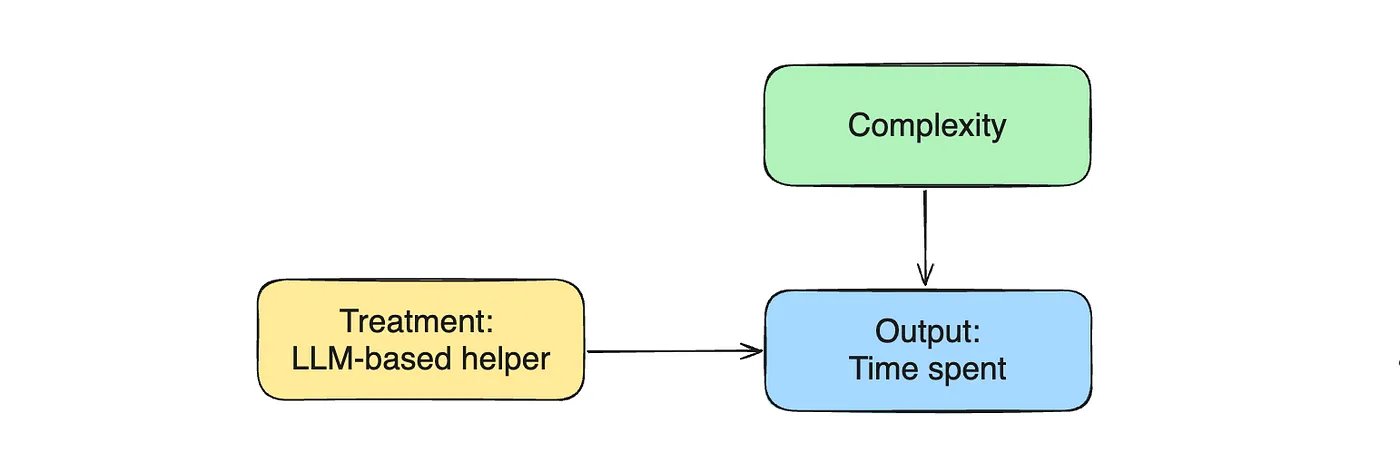

In [ ]:
# generate case-level data
tmp_data = []
for rec in tqdm.tqdm(agent_df.to_dict('records')):
  agent_id = rec['agent_id']
  treatment = rec['treatment']
  passed_training = rec['passed_training']
  average_mins = rec['average_mins_per_case']
  tenure = rec['tenure']
  cs_center = rec['cs-center']
  complexity = random.choices(['low', 'medium', 'high'], [0.6, 0.3, 0.1])[0]

  if complexity == 'medium':
    average_mins = average_mins + np.random.normal(15, 0.5)
  elif complexity == 'high':
    average_mins == average_mins + np.random.normal(30, 1)

  if (treatment == 1) and (passed_training == 1):
    average_mins = average_mins - np.random.normal(15, 0.5)
    if average_mins < 3:
      average_mins = np.random.normal(3, 0.5) + 1
  for case_seq in range(rec['num_cases']):
    tmp_data.append(
        {
              'agent_id': agent_id,
                'treatment': treatment,
                'case_seq': case_seq,
                'passed_training': passed_training,
                'tenure': tenure,
                'cs_center': cs_center,
                'time_spent_mins': np.random.normal(average_mins, 0.1*average_mins)/3,
                'complexity': complexity
        }
    )

100%|██████████| 922/922 [00:00<00:00, 5207.63it/s]


In [ ]:
df = pd.DataFrame(tmp_data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91821 entries, 0 to 91820
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   agent_id         91821 non-null  int64  
 1   treatment        91821 non-null  int64  
 2   case_seq         91821 non-null  int64  
 3   passed_training  91821 non-null  int64  
 4   tenure           91821 non-null  int64  
 5   cs_center        91821 non-null  object 
 6   time_spent_mins  91821 non-null  float64
 7   complexity       91821 non-null  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 5.6+ MB


In [ ]:
df['case_id'] = 1000*df.agent_id + df.case_seq

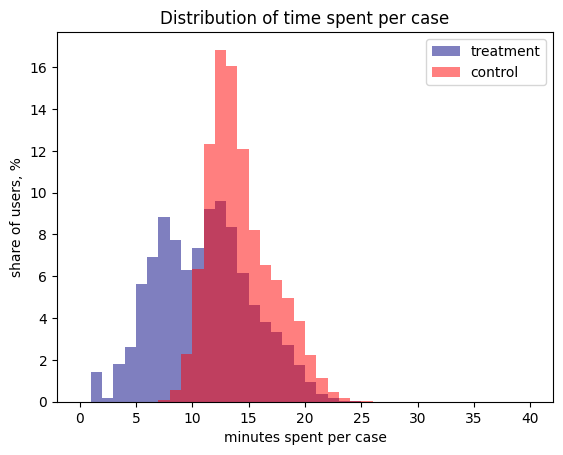

In [ ]:
hist_range = [0, 40]
hist_bins = 40

plt.hist(
    df[df.treatment == 1].time_spent_mins.values,
    label = 'treatment',
    alpha = 0.5, range = hist_range, bins = hist_bins,
    color = 'navy',
    weights = np.ones_like(df[df.treatment == 1].index)*100/df[df.treatment == 1].shape[0]
)

plt.hist(
    df[df.treatment == 0].time_spent_mins.values,
    label = 'control',
    alpha = 0.5, range = hist_range, bins = hist_bins,
    color = 'red',
    # calculating weights to get normalised histogram
    weights = np.ones_like(df[df.treatment == 0].index)*100/df[df.treatment == 0].shape[0]
)

plt.legend(loc = 'upper right')
plt.title('Distribution of time spent per case')
plt.xlabel('minutes spent per case')
plt.ylabel('share of users, %')
plt.show()

In [ ]:
df.groupby('treatment').aggregate(
    {'case_id': 'count', 'agent_id': 'nunique', 'time_spent_mins': 'mean'}
)


,case_id,agent_id,time_spent_mins
treatment,,,
0,43758,443,14.274327
1,48063,479,11.051902


show a summary table with count of cases, unique agents and average time spent on cases for each treatment group (0 and 1). this table provides insights into how the treatment affects these metrics

In [ ]:
df['within_sla'] = df.time_spent_mins.map(lambda x: 1 if x <= 15 else 0)


In [ ]:
df['passed_training'] = list(map(
    lambda p, t: p if t == 1 else 0,
    df.passed_training,
    df.treatment
))

In [ ]:
df = df.merge(agent_df[['agent_id', 'cs-center']], on = 'agent_id')

In [ ]:
df = df[['case_id', 'agent_id', 'treatment', 'time_spent_mins', 'cs-center', 'complexity', 'tenure', 'passed_training', 'within_sla']]

In [ ]:
df.to_csv('ops_experiment_synthetic_v2.csv', index = False)

In [ ]:
df.head()

,case_id,agent_id,treatment,time_spent_mins,cs-center,complexity,tenure,passed_training,within_sla
0,0,0,0,14.539181,FutureCS,low,6,0,1
1,1,0,0,11.885922,FutureCS,low,6,0,1
2,2,0,0,11.834895,FutureCS,low,6,0,1
3,3,0,0,15.437108,FutureCS,low,6,0,0
4,4,0,0,13.466895,FutureCS,low,6,0,1
